# Session 1.1: Loading and Manipulating Your Molecular Simulation Data

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Authors: 

- Dr Micaela Matta - micaela.matta@kcl.ac.uk 
- Dr Richard Gowers - richardjgowers@gmail.com
- Dr Irfan Alibay - ialibay@gmail.com

This notebook is adapted from materials developed for the [2021 PRACE Workshop](https://github.com/MDAnalysis/WorkshopPrace2021) and the [2018 Workshop/Hackathon](https://github.com/MDAnalysis/WorkshopHackathon2018)

## Google Colab package installs

This installs the necessary packages for Google Colab. Please only run these if you are using Colab.

In [ ]:
# NBVAL_SKIP
!if [ -n "$COLAB_GPU" ]; then pip install condacolab; fi
import condacolab
condacolab.install()

In [ ]:
# NBVAL_SKIP
import condacolab
condacolab.check()
!mamba install -c conda-forge mdanalysis mdanalysistests mdanalysisdata nglview

In [ ]:
# NBVAL_SKIP
# enable third party jupyter widgets
from google.colab import output
output.enable_custom_widget_manager()

### **Jupyter cheat sheet**:
- to run the currently highlighted cell, hold <kbd>&#x21E7; Shift</kbd> and press <kbd>&#x23ce; Enter</kbd>;
- to get help for a specific function, place the cursor within the function's brackets, hold <kbd>&#x21E7; Shift</kbd>, and press <kbd>&#x21E5; Tab</kbd>;

<div class="alert alert-warning"><b> REMEMBER: variables persist between cells</b> 
    
Be aware that it is the order of execution of cells that is important in a Jupyter notebook, not the <em>order</em> in which they appear. Python will remember <em>all</em> the code that was run previously, including any variables you have defined, irrespective of the order in the notebook. Therefore if you define variables lower down the notebook and then (re)run cells further up, those defined further down will still be present. </div> 

## Learning outcomes:
* How to load your molecular simulation data into MDAnalysis
* Basic features of the `MDAnalysis.Universe`
* Visualise your simulation data with `nglview`
* Working with `AtomGroup`s
* Select atoms of interest using `select_atoms`
* Selecting bonds


**This notebook introduces the fundamental objects of `MDAnalysis`:**

 - the `Universe`,
 - `AtomGroup`, and `Atom` objects.
 - selecting and manipulating `AtomGroup`s
 - `Residue`s and `Segment`s
 - `Bond` `Angle` and `Dihedral`


**Additional resources**
 - During the workshop, feel free to ask questions at any time
 - For more on how to use MDAnalysis, see the [User Guide](https://userguide.mdanalysis.org/2.0.0-dev0/) and [documentation](https://docs.mdanalysis.org/2.0.0-dev0/)
 - Ask questions on the [user mailing list](https://groups.google.com/group/mdnalysis-discussion) or on [Discord](https://discord.gg/fXTSfDJyxE)
 - Report bugs on [GitHub](https://github.com/MDAnalysis/mdanalysis/issues?)

## Table of Contents

1. [Fundamental MDAnalysis objects](#fundamentals)  
2. [Selecting Atoms](#selections)    
3. [Visualising systems](#visualisation)     
4. [Bonds, angles and dihedrals](#bonds)
5. [Transformations](#transformations)

<a id='fundamentals'></a>
# 1. Fundamental MDAnalysis objects


## Universe loading 101

> "If you wish to make an apple pie from scratch, you must first invent the Universe." 

> ~ Carl Sagan

First, we need to import `MDAnalysis`, giving us access to all the components in its namespace:

In [2]:
import MDAnalysis as mda

One of the most fundamental objects in the `MDAnalysis` data model is the `Universe` object.
A `Universe` can be thought of as an interface to all the data of a simulation;
it contains all of a simulations' topology information (names, charges, masses etc) at the least,
but usually also includes trajectory information (positions, velocities etc) as well.

In order to do anything, we do need some actual molecular dynamics data to work with. Let's load an example (the protein adenylate kinase, or AdK) from the MDAnalysis tests data:

In [ ]:
from MDAnalysis.tests.datafiles import PSF, DCD

To make a `Universe`, we need at the very least a topology file - see the [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation for a list of supported file formats. 

Since the type of topology file we're using in this example (a PSF file) doesn't contain coordinates, we'll also need to load a trajectory file (in this case a DCD file) so we have some position data to work with later. You'll learn more about working with trajectories in the next session. 


In [ ]:
u = mda.Universe(PSF, DCD)

print(u)

## AtomGroups

We now have a `Universe` object. Since the topology (PSF) file we loaded contained both atom identities and bond information, the `Universe` is able to access these details.



We can access all atoms in the `Universe` through the `Universe.atoms` attribute.
This returns an `AtomGroup`, which is probably the most important class we will learn about.

In [ ]:
ag = u.atoms
type(ag)

An `AtomGroup` is like an array of atoms, and offers access to the data of these atoms through various attributes:

In [ ]:
ag.indices

In [ ]:
ag.names

In [ ]:
ag.resnames

In [ ]:
ag.resids

In [ ]:
ag.charges

In [ ]:
ag.masses

In [ ]:
ag.types

All of these attributes of an `AtomGroup` return numpy arrays of the same length as the `AtomGroup` itself;
that is, each element corresponds to each atom in the `AtomGroup`, in order.

In [ ]:
print(ag.n_atoms)
print(len(ag.names))

In general, `MDAnalysis` will try and extract as much information as possible from the files given to `Universe`. The [topology readers](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/topology/init.html) documentation lists the attributes that are extracted from each filetype.

## Working with individual atoms

By slicing an `AtomGroup` we can access individual `Atom` objects.
These `Atom` objects will have singular versions of the various attributes of `AtomGroup`s.

In general working with individual `Atom` objects is discouraged as it is inefficient and will lead to poor performance.

In [ ]:
u = mda.Universe(PSF, DCD)
a = u.atoms[0]
print(a)

In [ ]:
print("name:", a.name)
print("resid:", a.resid)
print("resname:", a.resname)

## ResidueGroups and SegmentGroups

The `Universe` also gives higher-order topology objects, including `ResidueGroups` and `SegmentGroups`. We can access all residues in the `Universe` with:

In [ ]:
u.residues

And all segments with:

In [ ]:
u.segments

`ResidueGroups` and `SegmentGroups` also behave similarly to `AtomGroups`, with many of their methods returning `numpy` arrays with each element corresponding to a single residue or segment, respectively.

In [ ]:
u.residues.resnames

In [ ]:
u.segments.segids

You can also create a `ResidueGroup` from an `AtomGroup`:

In [ ]:
ag.residues

## Exercise 1

### 1a. Load the GRO topology file from `MDAnalysis.tests.datafiles` and count how many atoms, residues and segments it contains.**

In [ ]:
# Exercise 1a

### Solution 1a

In [ ]:
from MDAnalysis.tests.datafiles import GRO
u_gro = mda.Universe(GRO)
print('Atoms: ', u_gro.atoms.n_atoms)
print('Residues: ', u_gro.residues.n_residues)
print('Segments: ', u_gro.segments.n_segments)

### 1b. From the above universe, find the name of the:**
  - first segment
  - last atom
  - 10th residue.

In [ ]:
# Exercise 1b


### Solution 1b

In [ ]:
print('First segment:', u_gro.segments[0].segid)
print('Last atom: ', u_gro.atoms[-1].name)
print('10th residue: ', u_gro.residues[10].resname)

<a id='selections'></a>
# 2. Selecting atoms

It is also rare that we want to operate on all atoms in the system!

`MDAnalysis` offers a few different ways to select atoms,
in this section we will go over the most useful methods.

## Numpy style selections

As previously mentioned, an `AtomGroup` is like an array of atoms,
and therefore we can slice it exactly like we would slice a `numpy` array.

### Fancy indexing

The simplest option to select specific atom is to use fancy indexing. You can specify the atoms in a list

In [ ]:
u = mda.Universe(PSF, DCD)
u.atoms[[1, 4, 5 , 0]]

or as a range

In [ ]:
u.atoms[1:10]

### Boolean indexing

You can also create an array with `True`/`False` values of the same length as the `AtomGroup`. Every atom for which the array is set to `True` will be selected.

We can create such a boolean array by doing a comparison of a `numpy` array:

In [ ]:
selection_ar = u.atoms.resnames == 'GLY'
print("selection array = ", selection_ar)
u.atoms[selection_ar]

or shorter:

In [ ]:
u.atoms[u.atoms.resnames == 'GLY']

We can also do this with `ResidueGroup`s and `SegmentGroup`s, e.g.:

In [ ]:
u.residues[u.residues.resnames == 'GLY']

## Selection Strings and `select_atoms`

We've already seen that complex selections can be performed on `AtomGroups` using numpy style indexing.
However, `MDAnalysis` also features a CHARMM-style atom selection mechanism that is often more convenient.
We can consult the docstring for `select_atoms` to see the available selection keywords:

In [ ]:
u.atoms.select_atoms?

You can also see them in the docs [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html).

Although boolean selections work well enough for selecting out atoms from AtomGroups, the selection language makes more complex selections possible with probably less effort.

For example, we can select all glycines by:

In [ ]:
glycines = u.select_atoms("resname GLY")
glycines

If selecting by residue number, we can specify a range:

In [ ]:
first10resids = u.select_atoms("resid 1-10")
first10resids

We can use `and`/`or`/`not` with [logical conjunctions](https://en.wikipedia.org/wiki/Logical_conjunction):

In [ ]:
acidic = u.select_atoms("resname GLU or resname ASP")
acidic

For name like selections, we can also Unix shell-style wildcards such as `*`. Here for example `name OD*` would select atoms named `OD1, OD2, OD3` etc:

In [ ]:
acidic_o = acidic.select_atoms('name OD* or name OE*')
acidic_o

As a shortcut, multiple values can be given and these will be implicitly OR'd together.
To select all atoms with name NZ or NH* in residues named LYS or ARG:

In [ ]:
basic_n = u.select_atoms("(resname LYS ARG) and (name NZ NH*)")
basic_n

There are also several preset keywords for useful selections such as `backbone`, which selects all CA, C, O and N atoms:

In [ ]:
backbone_1 = u.select_atoms('backbone')
backbone_2 = u.select_atoms('name CA C O N')
backbone_1 == backbone_2

### Geometric selections

The `select_atoms` method also has various geometric keywords that make selecting atoms based on geometric criteria much easier.

For example, we can look for salt bridges by using the `around` selection operator to specify only atoms within 4 angstroms of a particular selection. Note we can simplify selection strings by referring to previous `AtomGroups`.

In [ ]:
acidic = u.select_atoms("group acidic and around 4 group basic", acidic=acidic_o, basic=basic_n)
acidic

You can also select atoms based on absolute position using `prop`, e.g.:

In [ ]:
upper_z = u.select_atoms('prop z > 10')
upper_z

## Set operations

`AtomGroup`s can also be combined using `&` for "and" and `|` for "or":

In [ ]:
heavy = u.atoms[u.atoms.masses > 10]
arg = u.atoms[u.atoms.resnames == 'ARG']
print(len(heavy), len(arg))
print(len(heavy & arg))

These two selections are identical:

In [ ]:
ag1 = u.atoms.select_atoms('resname LYS ARG')
ag2 = u.atoms.select_atoms('resname LYS') | u.atoms.select_atoms('resname ARG')

ag1 == ag2

We can also concatenate atomgroups with `+` and subtract with `-`; the following two selections are also identical: 

In [ ]:
no_H1 = u.atoms.select_atoms('resname LYS ARG and not name H*')
no_H2 = u.atoms.select_atoms('resname LYS ARG') - u.atoms.select_atoms('name H*')

no_H1 == no_H2

By design, an `AtomGroup` can have repeats of the same atom, for example through this selection:

In [ ]:
ag = u.atoms[[0, 0, 1, 2, 4, 4, 5]]
ag

The `unique` property will return a version of the `AtomGroup` with only one of each Atom:

In [ ]:
ag.unique

## Exercise 2

### 2a. Select residues 100 to 200, first using indexing and then using a selection string, and confirm you get the same selection.

In [ ]:
# Exercise 2a


### Solution 2a

In [ ]:
ag1 = u.residues[99:200]
ag2 = u.select_atoms("resid 100-200").residues
ag1 == ag2

What might be some reasons to prefer one method over the other?

### 2b. Count the number of arginine residues

In [ ]:
# Exercise 2b


### Solution 2b

In [ ]:
ag = u.select_atoms('resname ARG')
print(len(ag.residues))

### 2c. Select all nitrogen atoms within 5.0A of a carbon atom

In [ ]:
# Exercise 2c


### Solution 2c

In [ ]:
ag = u.select_atoms('name N* and around 5 name CA')
print(ag)

### 2d. Select all hydrogens that are bonded to an alpha carbon

*Hint: Look through the `select_atoms` docstring above or [here](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) for keywords that might help!*

In [ ]:
# Exercise 2d

### Solution 2d

In [ ]:
ag = u.select_atoms('name H* and bonded name CA')
print(ag)

<a id='visualisation'></a>
# 3. Visualisation with nglview

[nglview](https://github.com/nglviewer/nglview#usage) is a package that allows to visualise a MDAnalysis `Universe` or `AtomGroup` directly on the jupyter notebook. First we load the structure:

In [ ]:
import nglview as nv

view_u = nv.show_mdanalysis(u)
view_u.camera = 'orthographic'

And now we can launch the viewer:

In [ ]:
view_u

Have a play around - you can rotate, zoom (and play through the trajectory) to view the structure. You can also select atoms to display their information.

nglview can be useful to check that we are indeed selecting the correct `AtomGroup`:

In [ ]:
helix_1 = u.select_atoms('resid 12-25')
view_ag = nv.show_mdanalysis(helix_1)

view_ag

To add another selection to the same view:

In [ ]:
resid_20 = u.select_atoms('resid 20')
view_ag.add_trajectory(resid_20)

### Exercise 3

Show all atoms that are below the plane x=4.0

In [ ]:
# Exercise 3


### Solution 3

In [ ]:
ag = u.select_atoms('prop x < 4')
view_ex3 = nv.show_mdanalysis(ag)
view_ex3

<a id='bonds'></a>
# 4. Bonds, angles, and dihedrals

We can also get at connectivity information between atoms, such as bonds, angles, and dihedrals.
These are read from the input topology file,
with angle and dihedrals inferred from the bonds present,
i.e. there is a measurable angle between two bonds with a common atom.

For example in a PDB file CONECT records are read as bonds,
however if none are present...

In [3]:
# NBVAL_RAISES_EXCEPTION
dipep = mda.Universe('../ML/data/alanine-dipeptide-nowater.pdb')

dipep.bonds

/home/richard/miniconda3/envs/mda/lib/python3.10/site-packages/MDAnalysis/topology/PDBParser.py:317: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


NoDataError: This Universe does not contain bonds information

## Guessing bonds

Bonds are typically read form the topology file,
however if they are not present it is possible to guess these by passing the `guess_bonds=True` keyword argument to `Universe` creation.
This algorithm guesses bonds that are present based upon the positions of particles and their assumed radius.

In [4]:
dipep = mda.Universe('../ML/data/alanine-dipeptide-nowater.pdb',
                 guess_bonds=True)

In [ ]:
dipep.atoms.bonds

In [ ]:
dipep.atoms.angles

In [ ]:
dipep.atoms.dihedrals

Like AtomGroups, these can be sliced to yield individual items:

In [5]:
dipep.atoms.bonds[3]

<Bond between: Atom 1, Atom 4>

All of these give the associated measurement, bond length or angle, via the `values()` or `value()` method:

In [ ]:
dipep.atoms.bonds.values()

In [6]:
dipep.bonds[2].value()

1.0902151569748573

We can plot the distribution of bond lengths using matplotlib:

(array([ 2.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  2.,  0.,  1.]),
 array([1.01019632, 1.02845683, 1.04671734, 1.06497786, 1.08323837,
        1.10149889, 1.1197594 , 1.13801991, 1.15628043, 1.17454094,
        1.19280146, 1.21106197, 1.22932249, 1.247583  , 1.26584351,
        1.28410403, 1.30236454, 1.32062506, 1.33888557, 1.35714608,
        1.3754066 , 1.39366711, 1.41192763, 1.43018814, 1.44844866,
        1.46670917, 1.48496968, 1.5032302 , 1.52149071, 1.53975123,
        1.55801174]),
 <BarContainer object of 30 artists>)

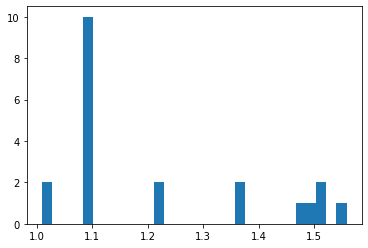

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(dipep.bonds.values(), bins=30)

## Selecting specific bonds

Like atoms, it is rarely interesting to look at **all** bonds.
Instead, based on a tuple of 

In [8]:
dipep.atoms.types

array(['H', 'C', 'H', 'H', 'C', 'O', 'N', 'H', 'C', 'H', 'C', 'H', 'H',
       'H', 'C', 'O', 'N', 'H', 'C', 'H', 'H', 'H'], dtype=object)

In [10]:
dipep.bonds.types()

[('H', 'C'), ('C', 'C'), ('C', 'O'), ('C', 'N'), ('N', 'H')]

<a id='transformations'></a>
# 5. Transformations

MDAnalysis has a convenient system to apply a set of transformations to coordinate data as it is loaded into memory. For example, you might need to apply PBC corrections and molecular fitting as is required by some analyses and visualisation.

Here we provide a brief overview of how to use "on-the-fly" transformation within MDAnalysis in order to address PBC issues and least-squares fit a trajectory to a reference frame.

**Note: it is worth noting that a lot of the MDAnalysis methods (especially those related to getting distances / bonds / angles / dihedrals) already apply PBC correction by default if provided with a box. Applying a transformation is often not necessary**

## The system before transformation

Let's first visualize the system we want to apply transformations to.

In [ ]:
# Create the universe
from MDAnalysisTests.datafiles import TPR, XTC

u_untransformed = mda.Universe(TPR, XTC)

view = nv.show_mdanalysis(u_untransformed)

view.add_representation('point', 'resname SOL')
view.center()

view

As we can see the system is broken across the periodic boundary. If we calculate the RMSF of the atoms (using MDAnalysis' RMSF analysis method), we notice areas of large fluctuation.

In [ ]:
from MDAnalysis.analysis import rms
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Get the c_alphas of the system and calculate an RMSF
c_alphas = u_untransformed.select_atoms('protein and name CA')
R = rms.RMSF(c_alphas).run()

# Let's plot the RMSF results
plt.plot(c_alphas.resids, R.results.rmsf)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')

## Applying the on-the-fly Transformation

MDAnalysis has some common built-in transformations, these can be accessed from teh transformations module. Here we will use the following to fit the protein in the center of the box:
  * `unwrap`: make the protein whole (note: this requires the Universe to have bond information)
  * `center`: center the protein at the center of the box
  * `wrap`: warp molecules across the PBC boundary back into the box
  * `fit_rot_trans`: translation and rotational fitting of the protein atoms (here we apply it to the alpha carbons)
  
Other transformations existing with MDAnalysis include; position averaging, rotate by a given angle on a given axis, translate by a given vector, set given box dimensions, and apply a PCA transform.

In [ ]:
u_transform = mda.Universe(TPR, XTC)
# now we have to create atomgroups to represent the protein, non-protein, and c-alpha sections of the system
protein = u_transform.select_atoms('protein')
not_protein = u_transform.select_atoms('not protein')
c_alphas = u_transform.select_atoms('protein and name CA')

In [ ]:
# next we create a chain of transformations which will be applied each time a frame is loaded from the Universe
# Note: the transformations are applied linearly, so the order of the transformations matters!
import MDAnalysis.transformations as tform
transform = [tform.unwrap(protein),
             tform.center_in_box(protein, wrap=True),
             tform.wrap(not_protein),
             tform.fit_rot_trans(
                 c_alphas, c_alphas, weights="mass")]
# We pass the list of transformations to the Universe's trajectory via the `add_transformations` method
u_transform.trajectory.add_transformations(*transform)

In [ ]:
transformed_v = nv.show_mdanalysis(u_transform)
transformed_v.add_representation('point', 'resname SOL')
transformed_v.center()
transformed_v

As we can see above the protein is now least-squares fit to the c_alphas of the first frame, and centered in the middle of the protein. Doing the RMSF calculation again shows that the areas of high fluctuation are now gone.

In [ ]:
# Get the c_alphas of the system and calculate an RMSF
R = rms.RMSF(c_alphas).run()

# Let's plot the RMSF results
plt.plot(c_alphas.resids, R.results.rmsf)
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')

### Extra: Applying to a single frame

Many of the transformations can be directly applied to an atomgroup without going through the the adding of transformations to the trajectory.

**Note: this is only done temporarily, once you change frames this transformation will be lost. One way to avoid losing this is to [transfer the coordinates to memory](https://userguide.mdanalysis.org/stable/reading_and_writing.html?highlight=transfer_to_memory#in-memory-trajectories) (although this comes at a much higher RAM cost):**

For example, if we wanted to directly unwrap a trajectory we could do the following:

In [ ]:
# Before the transformation, let's get the maximum bond length for all the protein atoms
# Long bonds usually happen because you cross a periodic boundary
protein = u_untransformed.select_atoms('protein')
protein.bonds.values().max()

In [ ]:
# Now we apply the transformation
protein.unwrap(compound='fragments')

protein.bonds.values().max()

In [ ]:
# You can also apply PBC directly on calling `bonds.values`
# switch frames back to the 0 index to reset the transformation
# See the next notebook for how to deal with frames
u_untransformed.trajectory[0]

print("no PBC max bond: ", protein.bonds.values().max())
print("apply PBC max bond: ", protein.bonds.values(pbc=True).max())
protein.unwrap(compound='fragments')
print("apply unwrap transform max bonx: ", protein.bonds.values().max())

# 6. Optional Tasks

- If you haven't already, read through the [selection documentation](https://docs.mdanalysis.org/2.0.0-dev0/documentation_pages/selections.html) and play around with all the selection options not covered above


- [nglview](https://github.com/nglviewer/nglview#usage) has a lot of options for visualising - you can add multiple selections to one view, change their colour and representation style and more - look through their documentaiton and see what you can create!